## Import modules 

In [1]:
import pandas as pd
import random
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None
)
seed = 123

np.random.seed(seed)
random.seed(seed)

## Dataset links

In [2]:
#################### 
# URL for csv files:
####################

# course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
# ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"
# profile_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"
# test_users_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/rs_content_test.csv"
# sim_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/sim.csv"
# bow_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/courses_bows.csv"
# course_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_processed.csv"
# user_profile_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"
# user_emb_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_embeddings.csv"
# item_emb_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_embeddings.csv"

# urls = [
#     course_genre_url,
#     ratings_url,
#     profile_genre_url,
#     test_users_url,
#     sim_url,
#     bow_url,
#     course_url,
#     user_profile_url,
#     user_emb_url,
#     item_emb_url
# ]

# for url in urls:
#     name = url.split("/")[-1]
#     df = pd.read_csv(url)
#     df.to_csv("../Data/"+name, index=False)

## Load datasets 

In [3]:
df_course_emb = pd.read_csv("../Data/course_embeddings.csv")
df_course_genre = pd.read_csv("../Data/course_genre.csv")
df_course_processed = pd.read_csv("../Data/course_processed.csv")
df_courses_bows = pd.read_csv("../Data/courses_bows.csv")
df_ratings = pd.read_csv("../Data/ratings.csv")
df_rs_content_test = pd.read_csv("../Data/rs_content_test.csv")
df_sim = pd.read_csv("../Data/sim.csv")
df_user_emb = pd.read_csv("../Data/user_embeddings.csv")
df_user_profile = pd.read_csv("../Data/user_profile.csv")

##  EDA

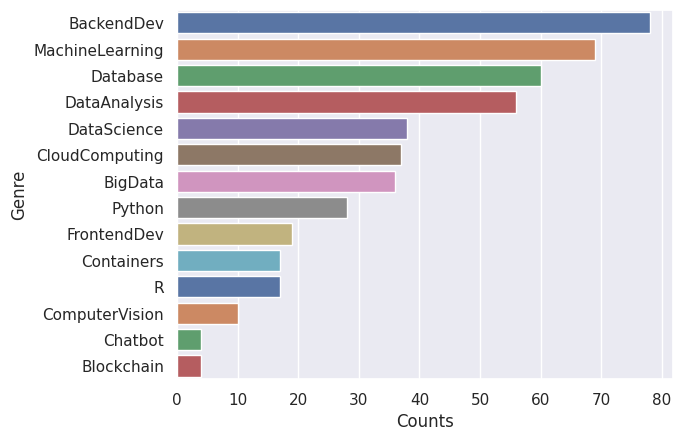

In [4]:
count_per_genre = df_course_genre.sum()[2:].sort_values(ascending=False)
sns.barplot(y=count_per_genre.index, x=count_per_genre, palette="deep")
plt.xlabel("Counts")
plt.ylabel("Genre")
# plt.title("Barchart of course counts per genre")
plt.show()

In [5]:
count_per_genre.mean(),count_per_genre.median()

(33.785714285714285, 32.0)

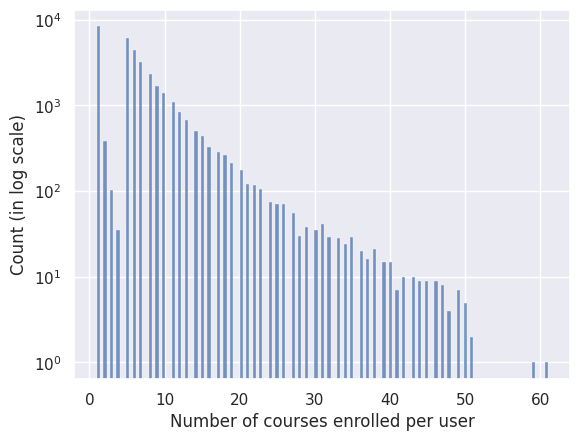

In [6]:
num_enrolments_byuser = df_ratings.groupby("user").size().sort_values(ascending=False)
enrolment_dist = pd.DataFrame(np.unique(num_enrolments_byuser,return_counts=True)).T
sns.histplot(num_enrolments_byuser)
plt.xlabel("Number of courses enrolled per user")
plt.ylabel("Count (in log scale)")
plt.yscale("log")
# plt.title("Histogram showing the enrollment distributions")
plt.show()

In [7]:
enrolment_dist

,0,1
0,1,8320
1,2,382
2,3,102
3,4,35
4,5,6179
5,6,4455
6,7,3168
7,8,2344
8,9,1665
9,10,1408


In [8]:
num_enrolments_byuser.mean(), num_enrolments_byuser.median()

(6.8819798825993335, 6.0)

In [9]:
top_courses = df_ratings.groupby("item").size().sort_values(ascending=False)[:20].reset_index()
top_courses.columns=['item', 'Ratings']

id2title = df_course_genre[["COURSE_ID","TITLE"]]

top20 = top_courses.merge(id2title,how="left", left_on="item", right_on="COURSE_ID")
top20 = top20.iloc[:,[2,3,1]]

top20

,COURSE_ID,TITLE,Ratings
0,PY0101EN,python for data science,14936
1,DS0101EN,introduction to data science,14477
2,BD0101EN,big data 101,13291
3,BD0111EN,hadoop 101,10599
4,DA0101EN,data analysis with python,8303
5,DS0103EN,data science methodology,7719
6,ML0101ENv3,machine learning with python,7644
7,BD0211EN,spark fundamentals i,7551
8,DS0105EN,data science hands on with open source tools,7199
9,BC0101EN,blockchain essentials,6719


In [10]:
titles = " ".join(title for title in df_course_genre.TITLE.astype(str))

In [11]:
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=900)
wordcloud.generate(titles)

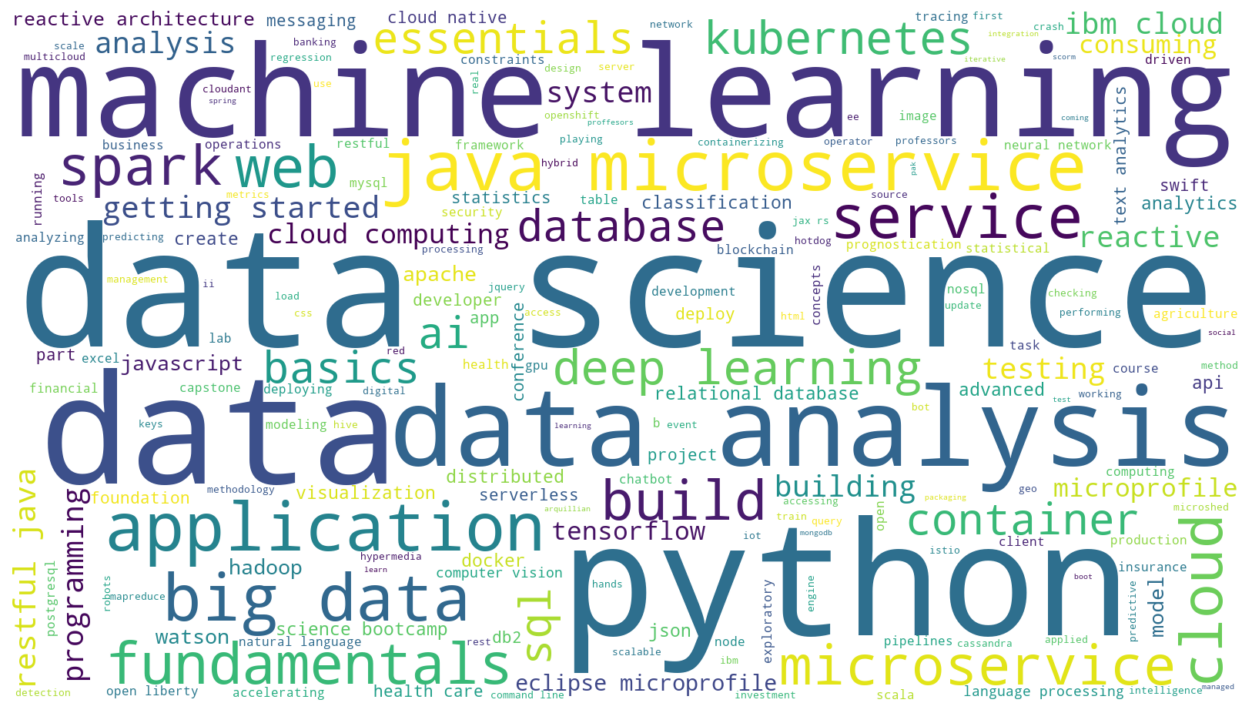

In [12]:
plt.figure(figsize=(16,9))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Profile based recommender system 

In [13]:
def get_reco(
    df_rs_content_test = df_rs_content_test,
    df_user_profile=df_user_profile,
    df_course_genre=df_course_genre,
    threshold=10
):
    test_usrs = df_rs_content_test.user
    test_usrs_profile = df_user_profile[df_user_profile.user.isin(test_usrs)].reset_index(drop=True)

    scores_df = test_usrs_profile.iloc[:,1:]@df_course_genre.iloc[:,2:].T
    scores_df.columns = df_course_genre.COURSE_ID
    scores_df.index = test_usrs_profile.user

    enrolled_courses_df = df_rs_content_test.pivot(index="user", columns="item", values="rating")>0
    reco_users_full=[]
    reco_courses_full=[]
    reco_scores_full=[]
    num_recos = []
    for enrolled_courses_row, scores_row in zip(enrolled_courses_df.iterrows(),scores_df.iterrows()):
        user = enrolled_courses_row[0]
        enrolled_courses = enrolled_courses_row[1].index[enrolled_courses_row[1]].to_numpy()
        new_courses = scores_df.columns.difference(enrolled_courses)
        new_scores = scores_row[1][new_courses].to_numpy()
        reco = new_scores >= threshold
        reco_courses = new_courses[reco]
        reco_scores = new_scores[reco]
        reco_users = np.full_like(reco_scores,user,dtype=np.int32)
        reco_users_full.extend(reco_users.tolist())
        reco_courses_full.extend(reco_courses.tolist())
        reco_scores_full.extend(reco_scores.tolist())
        num_recos.append(reco_scores.shape[0])
        

    reco_dict = {}
    reco_dict['USER'] = reco_users_full
    reco_dict['COURSE_ID'] = reco_courses_full
    reco_dict['SCORE'] = reco_scores_full
    reco_df = pd.DataFrame(reco_dict, columns=['USER', 'COURSE_ID', 'SCORE'])
    
    top_10_recos = reco_df.COURSE_ID.value_counts()[:10].reset_index()
    top_10_recos.columns = ["COURSE_ID","COUNT"]

    return reco_df, np.average(num_recos), top_10_recos

In [14]:
reco_df, avg_num_recos_per_user, top_10_recos = get_reco(threshold=16)
top_10_recos

,COURSE_ID,COUNT
0,TA0106EN,367
1,excourse21,364
2,excourse22,364
3,ML0122EN,361
4,RP0105EN,360
5,excourse73,360
6,excourse72,360
7,TMP0105EN,356
8,excourse31,354
9,SC0103EN,329


In [15]:
avg = []
for threshold in range(10,31,1):
    reco_df, avg_num_recos_per_user, top_10_recos = get_reco(threshold=threshold)
    avg.append(avg_num_recos_per_user)

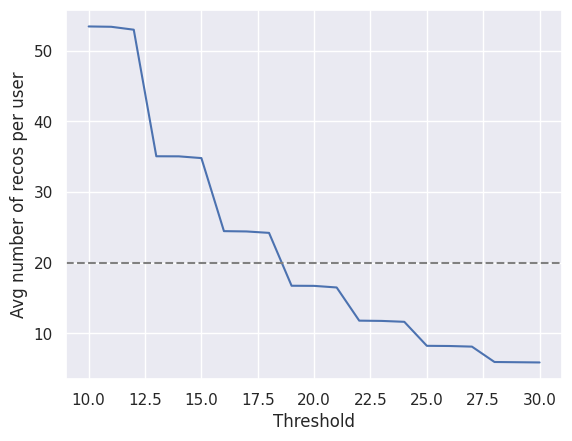

In [16]:
plt.plot(range(10,31,1), avg)
# plt.xticks(range(10,33,3))
plt.xlabel("Threshold")
plt.ylabel("Avg number of recos per user")
plt.axhline(20, ls="--", color="gray")
plt.show()

## Cosine similarity 

In [17]:
def get_cosine_reco(
    df_courses_bows=df_courses_bows,
    df_rs_content_test=df_rs_content_test,
    df_sim=df_sim,
    threshold=0.5
):
    
    course_index_id_df = df_courses_bows.groupby(["doc_index","doc_id"]).max().reset_index()["doc_id"]

    index2id_course = course_index_id_df.to_dict()
    id2index_course = {item:key for key,item in index2id_course.items()}
        
    enrolled_courses_df = df_rs_content_test.pivot(index="user",columns="item",values="rating")>0
        
    reco_users_full=[]
    reco_courses_full=[]
    reco_scores_full=[]
    num_recos = []

    for user, enrolled_courses_row in enrolled_courses_df.iterrows():
        enrolled_courses = enrolled_courses_row.index[enrolled_courses_row.to_numpy()]
        enrolled_courses_index = np.asarray([id2index_course[key] for key in enrolled_courses])
        new_courses_index = np.delete(range(df_sim.shape[0]),enrolled_courses_index)
        scores = df_sim.to_numpy()[enrolled_courses_index][:,new_courses_index].max(axis=0)
        recos = scores>threshold
        reco_index = new_courses_index[recos]
        reco_courses = [index2id_course[key] for key in reco_index]
        reco_scores = scores[recos]
        reco_users = np.full_like(reco_scores,user,dtype=np.int32)

        reco_users_full.extend(reco_users.tolist())
        reco_courses_full.extend(reco_courses)
        reco_scores_full.extend(reco_scores.tolist())
        num_recos.append(reco_scores.shape[0])

    reco_dict = {}
    reco_dict['USER'] = reco_users_full
    reco_dict['COURSE_ID'] = reco_courses_full
    reco_dict['SCORE'] = reco_scores_full
    reco_df = pd.DataFrame(reco_dict, columns=['USER', 'COURSE_ID', 'SCORE'])

    top_10_recos = reco_df.COURSE_ID.value_counts()[:10].reset_index()
    top_10_recos.columns = ["COURSE_ID","COUNT"]

    return reco_df, np.average(num_recos), top_10_recos

In [18]:
reco_df, avg_num_recos_per_user, top_10_recos = get_cosine_reco(threshold=0.5)
top_10_recos

,COURSE_ID,COUNT
0,excourse68,887
1,excourse67,854
2,excourse32,828
3,excourse23,779
4,excourse36,779
5,TMP107,773
6,excourse74,728
7,DS0110EN,726
8,excourse65,715
9,excourse09,715


In [19]:
avg = []
for threshold in np.linspace(0.1,1.0,10):
    reco_df, avg_num_recos_per_user, top_10_recos = get_cosine_reco(threshold=threshold)
    avg.append(avg_num_recos_per_user)


In [20]:
np.linspace(0.1,1.0,10), avg

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [200.322, 140.315, 95.446, 61.77, 26.37, 11.377, 3.702, 0.664, 0.619, 0.0])

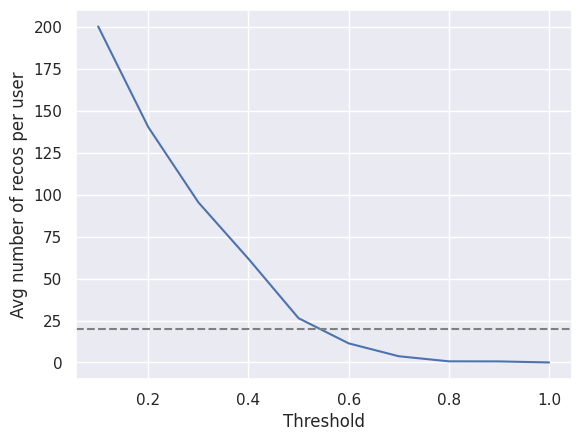

In [21]:
plt.plot(np.linspace(0.1,1.0,10), avg)
# plt.xticks(np.linspace(0.1,1.0,10))
plt.xlabel("Threshold")
plt.axhline(20, ls="--", color="gray")
plt.ylabel("Avg number of recos per user")
plt.show()

## User profile clustering

In [22]:
def get_clustering_reco(
    df_user_profile=df_user_profile,
    df_rs_content_test=df_rs_content_test,
    threshold=20,
    n_clusters=15,
    find_n=None
):
    user_id = df_user_profile.user
    fearures_names = df_user_profile.columns[1:]
    std = StandardScaler()
    normalized_user_profiles = std.fit_transform(df_user_profile[fearures_names])
    if find_n is not None:
        ##############
        # Find K 
        ##############
        inertia=[]
        n_range = np.arange(find_n)+1
        for n in n_range:
            km = KMeans(n_clusters=n+1, n_init="auto")
            clusters = km.fit_predict(normalized_user_profiles)
            inertia.append(km.inertia_)
        # plt.figure(figsize=(10,5.625))
        plt.plot(n_range, inertia)
        plt.xlabel("n_clusters")
        plt.ylabel("inertia")
        # plt.xticks(ticks=n_range)
        plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
        plt.title("KMeans inertia vs n_clusters")
        plt.show()
        ##############
    km = KMeans(n_clusters=n_clusters, n_init="auto")
    clusters = km.fit_predict(normalized_user_profiles)
    cluster_df = pd.DataFrame({"user":user_id,"cluster":clusters})

    test_usr_cluster = pd.merge(df_rs_content_test,cluster_df,left_on="user",right_on="user")

    courses_cluster = test_usr_cluster[['item', 'cluster']].copy()
    courses_cluster['count'] = np.ones((len(courses_cluster)))
    courses_cluster=courses_cluster.groupby(['cluster','item']).agg(enrollments = ('count','sum')).reset_index()

    item_vs_cluster_df = courses_cluster.pivot(index="cluster",columns="item",values="enrollments")
    item_vs_usr = df_rs_content_test.pivot(index="user",columns="item",values="rating")

    test_user_cluster_unique = test_usr_cluster.groupby(["user","cluster"]).max().drop(columns=["item","rating"]).reset_index()
    cluster_vs_user = pd.get_dummies(test_user_cluster_unique,prefix="cluster",columns=["cluster"])
    cluster_vs_user.index=cluster_vs_user.user
    cluster_vs_user = cluster_vs_user.drop(columns=["user"])

    user_vs_clusteritem_matrix = cluster_vs_user.values @ item_vs_cluster_df.fillna(0).values
    user_vs_clusteritem_matrix.shape
    reco_score_matrix = user_vs_clusteritem_matrix*item_vs_usr.isna().values
    reco_users_list = cluster_vs_user.index.values
    reco_courses_list = item_vs_cluster_df.columns.values

    reco_users_full=[]
    reco_courses_full=[]
    reco_scores_full=[]
    num_recos = []
    for user, user_reco_score in zip(reco_users_list, reco_score_matrix):
        reco_bool = user_reco_score > threshold
        reco_courses = reco_courses_list[reco_bool]
        reco_scores = user_reco_score[reco_bool]
        reco_users = np.full_like(reco_scores,user,dtype=np.int32)

        reco_users_full.extend(reco_users.tolist())
        reco_courses_full.extend(reco_courses)
        reco_scores_full.extend(reco_scores.tolist())
        num_recos.append(reco_scores.shape[0])

    reco_dict = {}
    reco_dict['USER'] = reco_users_full
    reco_dict['COURSE_ID'] = reco_courses_full
    reco_dict['SCORE'] = reco_scores_full
    reco_df = pd.DataFrame(reco_dict, columns=['USER', 'COURSE_ID', 'SCORE'])

    top_10_recos = reco_df.COURSE_ID.value_counts()[:10].reset_index()
    top_10_recos.columns = ["COURSE_ID","COUNT"]

    return reco_df, np.average(num_recos), top_10_recos

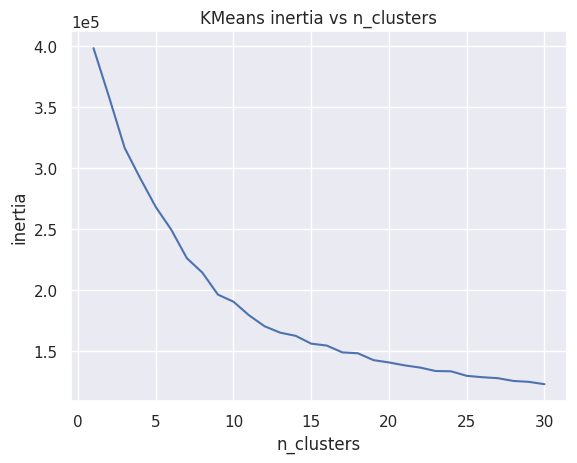

,COURSE_ID,COUNT
0,ST0101EN,697
1,ML0115EN,678
2,DS0103EN,657
3,DB0101EN,655
4,BD0211EN,647
5,RP0101EN,635
6,DA0101EN,626
7,BD0111EN,561
8,CO0101EN,556
9,CC0101EN,550


In [23]:
reco_df, avg_num_recos, top10recos = get_clustering_reco(
    threshold=8,
    find_n=30,
    n_clusters=15
)
top10recos

In [24]:
avg = []
for threshold in np.arange(2,31,1):
    reco_df, avg_num_recos_per_user, top_10_recos = reco_df, avg_num_recos, top10recos = get_clustering_reco(
    threshold=threshold,
    # find_n=30,
    n_clusters=15
)
    avg.append(avg_num_recos_per_user)

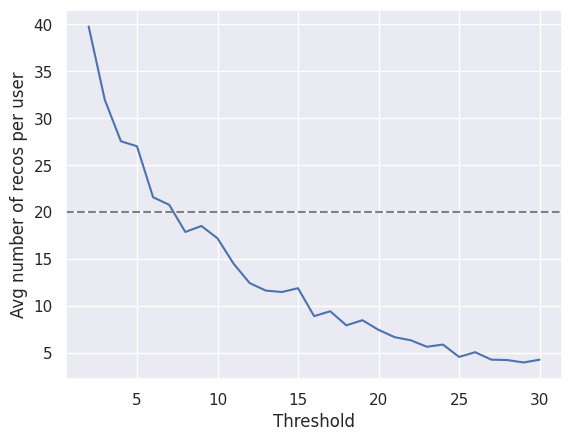

In [25]:
plt.plot(np.arange(2,31,1), avg)
# plt.xticks(np.arange(2,32,2))
plt.xlabel("Threshold")
plt.axhline(20, ls="--", color="gray")
plt.ylabel("Avg number of recos per user")
plt.show()

# Collaborative-filtering Recommender System using Supervised Learning 

## KNN based recommender system 

In [26]:
df_user_profile

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,2102054,3.0,3.0,3.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,0.0,3.0
33897,2102356,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33898,2102680,3.0,6.0,6.0,0.0,0.0,14.0,0.0,9.0,0.0,0.0,3.0,0.0,0.0,0.0
33899,2102983,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Average RMSE on test dataset')

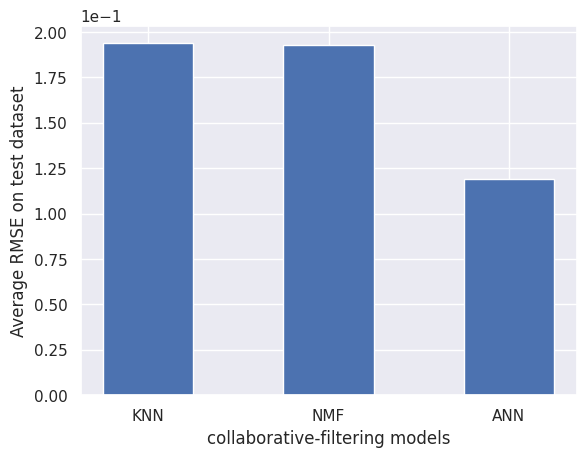

In [35]:
plt.bar(x=["KNN","NMF","ANN"],height=[0.1938,0.1930,0.1191],width=0.5)
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
plt.xlabel("collaborative-filtering models")
plt.ylabel("Average RMSE on test dataset")